<a href="https://colab.research.google.com/github/Michal-Janulewski/Uczenie-Maszynowe-w-Finansach/blob/Quiz-1/Zadanie_1_Uczenie_maszynowe_w_finansach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

In [101]:
#Pobieramy dane z githuba
data = pd.read_csv("https://raw.githubusercontent.com/Michal-Janulewski/Uczenie-Maszynowe-w-Finansach/Quiz-1/case1.csv", sep = ";")

In [102]:
data = data.drop(["Index"], axis=1)
data = data.drop(["Address"], axis=1)
data = data.drop(["Unnamed: 0"], axis=1)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [104]:
data.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [105]:
# numeryczne
numericals = data.select_dtypes(include=['float','int']).columns
data[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [106]:
categories = data.select_dtypes('O').columns.astype('category')
data[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [107]:
data.drop(data[categories], axis=1, inplace=True)

In [108]:
data[numericals].var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [109]:
print(data['FLAG'].value_counts())

FLAG
0    7662
1    2179
Name: count, dtype: int64


In [110]:
# Filtering the features with 0 variance
var0 = data.var() == 0
print(data.var()[var0])
print('\n')
# Drop features with 0 variance --- these features will not help in the performance of the model
data.drop(data.var()[var0].index, axis = 1, inplace = True)
print(data.var())
print(data.shape)

ERC20 avg time between sent tnx        0.0
ERC20 avg time between rec tnx         0.0
ERC20 avg time between rec 2 tnx       0.0
ERC20 avg time between contract tnx    0.0
ERC20 min val sent contract            0.0
ERC20 max val sent contract            0.0
ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062

In [111]:
#Sprawdzamy czy dane mają brakujące wartości
data.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [112]:
# Zastąpienie brakujących zmiennych medianą
data.fillna(data.median(), inplace=True)
data.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [113]:
#Sprawdzamy czy istnieją zduplikowane wartości
data[data.duplicated()]

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
2933,0,5980.35,18633.46,498256.47,21,20,0,2,18,1.990000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2934,0,7042.64,2694.86,80594.87,8,9,0,8,7,0.001000,...,0.0,2.0,0.299173,140.102687,70.200930,140.102687,140.102687,140.102687,1.0,2.0
2935,0,3098.05,4755.44,382590.08,36,57,0,2,2,0.098677,...,0.0,3.0,0.000000,205.045342,75.180566,0.000000,0.000000,0.000000,0.0,3.0
2936,0,0.00,0.00,0.00,0,1,0,1,0,0.250303,...,0.0,5.0,0.000000,64.921895,14.443795,0.000000,0.000000,0.000000,0.0,5.0
2937,0,0.00,0.00,0.00,0,1,0,1,0,0.804725,...,0.0,5.0,0.000000,171.588208,38.011146,0.000000,0.000000,0.000000,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.0,1.0,1.337000,1.337000,1.337000,0.000000,0.000000,0.000000,0.0,1.0
9818,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.0,1.0,13.370000,13.370000,13.370000,0.000000,0.000000,0.000000,0.0,1.0
9823,1,0.00,0.00,0.00,0,0,1,0,0,0.000000,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
9833,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0


In [114]:
#Usuwamy zduplikowane wartości
data.drop_duplicates(keep="first",inplace=True)

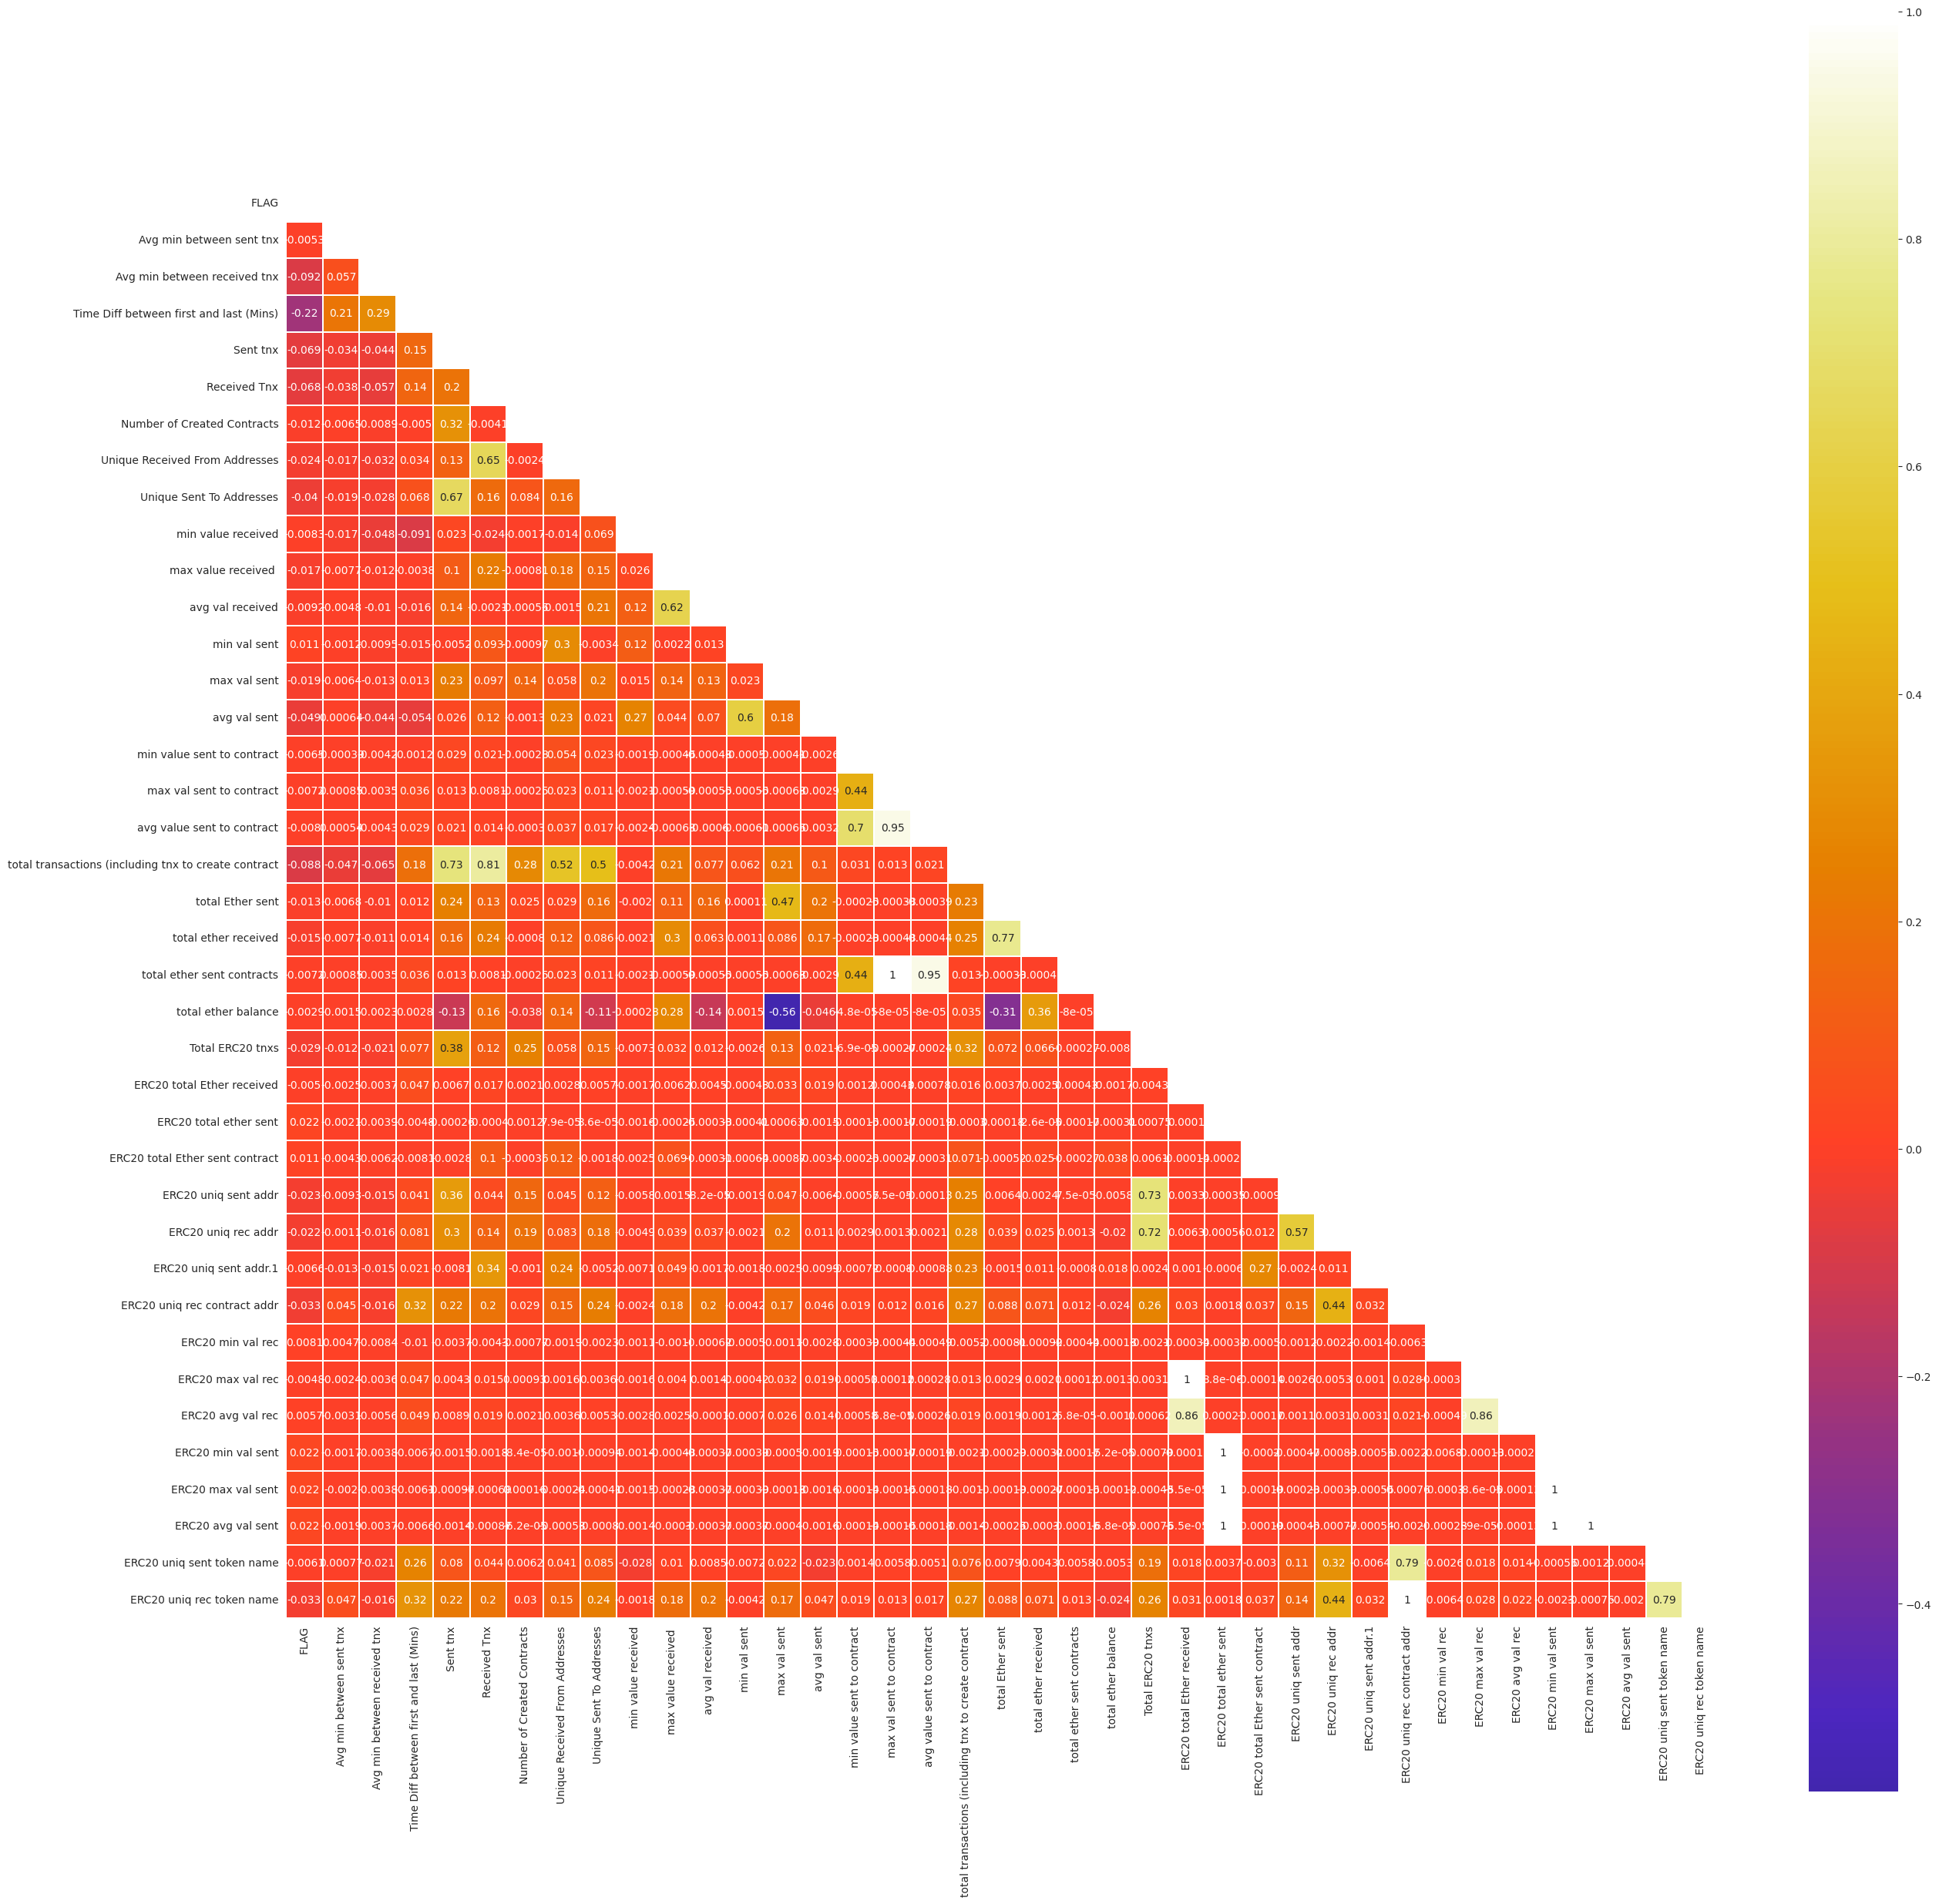

In [115]:
# Macierz korealcji
corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9288 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9288 non-null   int64  
 1   Avg min between sent tnx                              9288 non-null   float64
 2   Avg min between received tnx                          9288 non-null   float64
 3   Time Diff between first and last (Mins)               9288 non-null   float64
 4   Sent tnx                                              9288 non-null   int64  
 5   Received Tnx                                          9288 non-null   int64  
 6   Number of Created Contracts                           9288 non-null   int64  
 7   Unique Received From Addresses                        9288 non-null   int64  
 8   Unique Sent To Addresses                              9288 non-

In [117]:
# Drop one of those highly correlated features
data.drop(['total transactions (including tnx to create contract','total ether sent contracts', 'max val sent to contract','max val sent', 'avg value sent to contract', 'Unique Sent To Addresses','Unique Received From Addresses', 'total ether received',  'min value received', 'min val sent', 'Total ERC20 tnxs', 'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr', 'ERC20 min val rec', 'ERC20 max val rec', 'ERC20 avg val rec', 'ERC20 min val sent', 'ERC20 max val sent', 'ERC20 avg val sent' ], axis=1, inplace=True)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9288 entries, 0 to 9840
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9288 non-null   int64  
 1   Avg min between sent tnx                 9288 non-null   float64
 2   Avg min between received tnx             9288 non-null   float64
 3   Time Diff between first and last (Mins)  9288 non-null   float64
 4   Sent tnx                                 9288 non-null   int64  
 5   Received Tnx                             9288 non-null   int64  
 6   Number of Created Contracts              9288 non-null   int64  
 7   max value received                       9288 non-null   float64
 8   avg val received                         9288 non-null   float64
 9   avg val sent                             9288 non-null   float64
 10  min value sent to contract               9288 non-nul

In [119]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]
print(X.shape, y.shape)

(9288, 19) (9288,)


In [120]:
# Podział na zbiór treningowy (80%) i zbiór testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7430, 19) (7430,)
(1858, 19) (1858,)


In [121]:
PT = PowerTransformer()
PT_train = PT.fit_transform(X_train)
PT_test = PT.transform(X_test)

In [122]:
PT_df = pd.DataFrame(PT_train, columns=X_train.columns)
PT_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,min value sent to contract,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 uniq sent token name,ERC20 uniq rec token name
0,1.116310,0.513753,-0.001437,0.689181,-0.294890,-0.414415,-1.063372,-0.995325,-1.057331,-0.016409,-0.824029,-0.008168,1.505508,2.388635,-0.039517,2.330904,-0.056926,2.241402,0.696688
1,-0.346900,0.691707,0.132887,0.733129,0.446493,-0.414415,1.184811,1.264661,1.350482,-0.016409,1.312131,-0.008168,-0.741070,-0.427071,-0.039517,-0.452898,-0.056926,-0.453208,-0.955112
2,0.631697,1.839202,1.221988,0.584370,-0.143963,-0.414415,-0.639982,-0.645316,-0.759008,-0.016409,-0.418362,-0.008168,-0.741070,-0.427071,-0.039517,-0.452898,-0.056926,-0.453208,-0.955112
3,-1.155724,-1.254087,-1.687827,-0.697249,-1.213191,-0.414415,-0.504958,-0.036868,0.042764,-0.016409,-0.593565,-0.008168,-0.741070,-0.427071,-0.039517,-0.452898,-0.056926,-0.453208,-0.955112
4,0.539766,-1.134820,-1.068793,-0.303693,-0.771314,-0.414415,0.981267,1.231097,1.292093,-0.016409,0.724715,-0.008168,-0.741070,-0.427071,-0.039517,-0.452898,-0.056926,-0.453208,-0.955112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,-1.155724,0.445139,0.698484,-1.513634,1.427635,2.412874,-0.932089,-0.900842,-1.198677,-0.016409,-1.332788,-0.007783,0.007685,-0.427071,-0.039517,-0.452898,-0.056926,-0.453208,0.696688
7426,1.365987,0.319004,-0.102795,-0.303693,-0.023473,-0.414415,-0.608789,-0.693709,-0.039077,-0.016409,-0.388093,-0.008168,-0.173322,-0.427071,-0.039517,-0.452898,-0.056926,-0.453208,0.236502
7427,-1.155724,1.544194,0.824894,-0.697249,-0.294890,-0.414415,0.636042,0.540380,1.174545,-0.016409,0.357813,-0.008168,1.586095,-0.427071,-0.039517,-0.452898,-0.056926,-0.453208,1.427133
7428,1.347118,0.927970,0.646731,0.639993,0.524954,-0.414415,1.867072,1.503898,1.662761,-0.016409,1.583394,-0.008168,1.473783,-0.427071,-0.039517,-0.452898,-0.056926,-0.453208,1.110148


In [123]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {PT_df.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(PT_df, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((7430, 19), (7430,))
Shape of the training after SMOTE: ((12174, 19), (12174,))


In [124]:
LR = LogisticRegression(random_state=123)
LR.fit(x_tr_resample, y_tr_resample)


norm_test_f = PT.transform(X_test)

pred1 = LR.predict(norm_test_f)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [125]:
print(classification_report(y_test, pred1))
print(confusion_matrix(y_test, pred1))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1545
           1       0.56      0.90      0.69       313

    accuracy                           0.86      1858
   macro avg       0.77      0.88      0.80      1858
weighted avg       0.91      0.86      0.88      1858

[[1323  222]
 [  30  283]]


In [126]:
accuracy = accuracy_score(y_test, pred1)
precision = precision_score(y_test, pred1)
recall = recall_score(y_test, pred1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, pred1)

Accuracy: 0.8643702906350915
Precision: 0.5603960396039604
Recall: 0.9041533546325878


array([[1323,  222],
       [  30,  283]])

In [127]:
#RandomForest Classifier
RF = RandomForestClassifier(random_state=123)
model2= RF.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = PT.transform(X_test)

pred2 = model2.predict(sc_test)

accuracy = accuracy_score(y_test, pred2)
precision = precision_score(y_test, pred2)
recall = recall_score(y_test, pred2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, pred2)

Accuracy: 0.9698600645855759
Precision: 0.9028213166144201
Recall: 0.9201277955271565


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[1514,   31],
       [  25,  288]])

In [128]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1545
           1       0.90      0.92      0.91       313

    accuracy                           0.97      1858
   macro avg       0.94      0.95      0.95      1858
weighted avg       0.97      0.97      0.97      1858



In [129]:
#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
model3= knn.fit(x_tr_resample, y_tr_resample)
pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, pred3)
precision = precision_score(y_test, pred3)
recall = recall_score(y_test, pred3)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, pred3)

Accuracy: 0.832615715823466
Precision: 0.5555555555555556
Recall: 0.03194888178913738


array([[1537,    8],
       [ 303,   10]])

In [130]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1545
           1       0.56      0.03      0.06       313

    accuracy                           0.83      1858
   macro avg       0.70      0.51      0.48      1858
weighted avg       0.79      0.83      0.77      1858



In [ ]:
#Ostatecznie wybór padł na model klasyfikujący według drzew losowych, ponieważ w tym modelu było najmniej przypadków gdy model klasyfikował przypadki nie będace oszustwami jako oszustwa (1514 z 1545 zsotało poprawnie zaklasyfikowanych)
#W przypadku dwóch pozostałych modeli błędnie zaklasyfikowanych obiektów było znacznie więcej.